# Alibi Detect / Maximum Mean Discrepancy

See: https://docs.seldon.io/projects/alibi-detect/en/stable/methods/mmddrift.html

In [1]:
import pickle
import matplotlib.pyplot as plt

from detectors.AlibiMMDDetector import AlibiMMDDetector

# load data

In [2]:
# Robert
file = 'data/movies/embeddings/amazon_small_gradual_drift.pickle'

# EML4U Experiment server
file = '../../data/amazon/amazon_small_gradual_drift.pickle'

with open(file, 'rb') as handle:
    gradual_dict = pickle.load(handle)

# initiate detector

In [3]:
detector = AlibiMMDDetector()
detector.fit(gradual_dict['orig'][0])

AlibiMMDDetector()

# general tests

In [4]:
# Boolean values
if(True):
    p_s = []
    for percentage in gradual_dict['drifted'][0]:
        p_s.append(detector.predict(percentage))
    print(p_s)

# Float values
if(True):
    p_s = []
    for percentage in gradual_dict['drifted'][0]:
        p_s.append(detector.predict_proba(percentage))
    print(p_s)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.59, 0.55, 0.5, 0.52, 0.6, 0.51, 0.57, 0.52, 0.61, 0.52, 0.6]


# plotting results

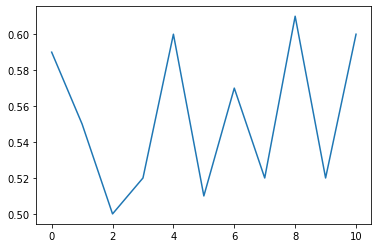

In [5]:
plt.plot(p_s)